In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
wine = pd.read_csv('wine.csv')

In [3]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
wine.describe(include ='all')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
scaler = StandardScaler(with_mean=True,with_std=True)
scaled_data = pd.DataFrame(scaler.fit_transform(wine),columns=wine.columns)

In [7]:
scaled_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [8]:
decomposed = PCA(n_components=2)
Pc = pd.DataFrame(decomposed.fit_transform(scaled_data),columns=['PC1','PC2'])

In [9]:
Pc

,PC1,PC2
0,-3.522934,-1.453098
1,-2.528858,0.330019
2,-2.785029,-1.036936
3,-3.922588,-2.768210
4,-1.407511,-0.867773
...,...,...
173,3.627996,-2.206617
174,2.942729,-1.752263
175,3.027272,-2.756040
176,2.755222,-2.293784


In [10]:
decomposed.explained_variance_ratio_

array([0.39542486, 0.17836259])

In [11]:
np.cumsum(decomposed.explained_variance_ratio_)

array([0.39542486, 0.57378745])

In [12]:
decomposed2 = PCA(n_components=3)
Pc1 = pd.DataFrame(decomposed2.fit_transform(scaled_data),columns=['PC1','PC2','PC3'])

In [13]:
Pc1

,PC1,PC2,PC3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


In [14]:
decomposed2.explained_variance_ratio_

array([0.39542486, 0.17836259, 0.10329102])

In [15]:
np.cumsum(decomposed2.explained_variance_ratio_)

array([0.39542486, 0.57378745, 0.67707846])

In [16]:
decomposed3 = PCA(n_components=4)
Pc2 = pd.DataFrame(decomposed3.fit_transform(scaled_data),columns=['PC1','PC2','PC3','PC4'])
Pc2

,PC1,PC2,PC3,PC4
0,-3.522934,-1.453098,-0.164795,-0.013273
1,-2.528858,0.330019,-2.026707,-0.417144
2,-2.785029,-1.036936,0.983238,0.664232
3,-3.922588,-2.768210,-0.174968,0.565088
4,-1.407511,-0.867773,2.025829,-0.440906
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705
174,2.942729,-1.752263,0.207480,0.399381
175,3.027272,-2.756040,-0.940803,0.607758
176,2.755222,-2.293784,-0.550474,-0.391570


In [17]:
np.cumsum(decomposed3.explained_variance_ratio_)

array([0.39542486, 0.57378745, 0.67707846, 0.74335831])

## PCA with 4 components giving 74% of information for the dataset 
## 2 components giving only 57% of information

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings("ignore")

## K-MEANS

In [19]:
kmeans = KMeans(n_clusters =2)
k_cluster = kmeans.fit_transform(Pc2)

In [20]:
wcss = []
for i in range(2,10):
    kmeans1 = KMeans(n_clusters=i)
    kmeans1.fit(Pc2)
    wcss.append(kmeans1.inertia_)

In [21]:
wcss

[1089.0793495025237,
 653.4027363523222,
 560.7955365874263,
 494.48875362109544,
 444.81508519734206,
 405.1420968480156,
 364.8095102763327,
 344.2647395775805]

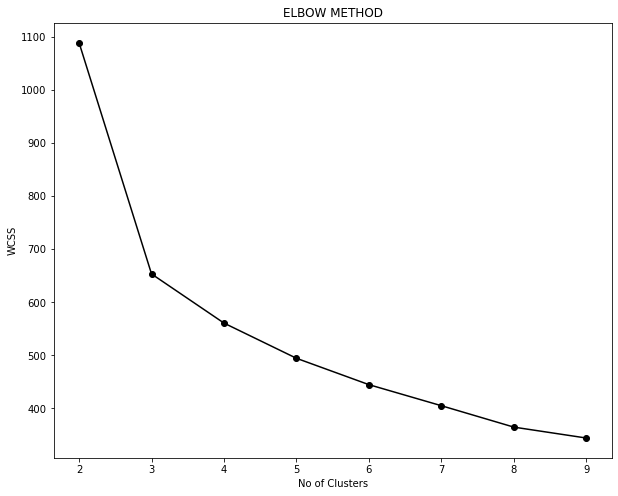

In [22]:
plt.figure(figsize=(10, 8))
plt.plot(range(2,10),wcss,'-o', color='black')
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
y_kmeans = kmeans.fit_predict(Pc2)  
y_kmeans


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [24]:
Pc2['cluster'] = y_kmeans
Pc2

,PC1,PC2,PC3,PC4,cluster
0,-3.522934,-1.453098,-0.164795,-0.013273,0
1,-2.528858,0.330019,-2.026707,-0.417144,0
2,-2.785029,-1.036936,0.983238,0.664232,0
3,-3.922588,-2.768210,-0.174968,0.565088,0
4,-1.407511,-0.867773,2.025829,-0.440906,0
...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,1
174,2.942729,-1.752263,0.207480,0.399381,1
175,3.027272,-2.756040,-0.940803,0.607758,1
176,2.755222,-2.293784,-0.550474,-0.391570,1


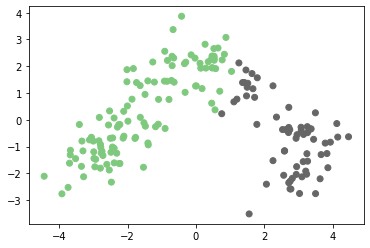

In [25]:
plt.scatter('PC1', 'PC2',c=y_kmeans, cmap= plt.cm.Accent, data=Pc2)

## DBSCAN

In [26]:
dbscan = DBSCAN(eps=0.50, min_samples=5)
dbscan.fit(Pc)  

DBSCAN()

In [27]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(Pc)
distances, indices = nbrs.kneighbors(Pc)

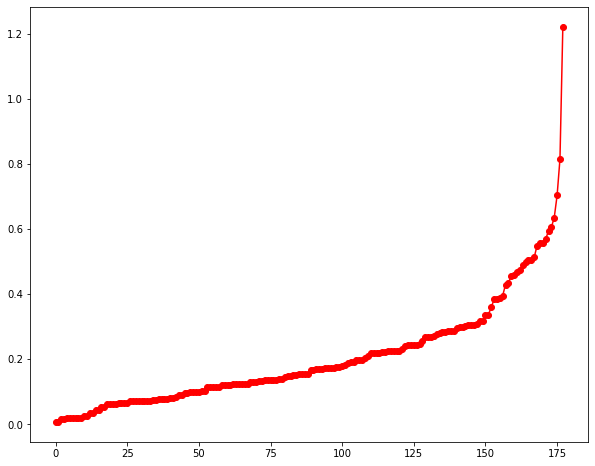

In [28]:
plt.figure(figsize=(10, 8))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances,'-o', color='red')

In [29]:
labels = dbscan.labels_
labels

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  1,  1, -1, -1,  2, -1, -1,  2,
       -1,  3,  1,  3, -1,  0,  3,  2,  2,  1, -1,  3, -1,  3,  2,  4,  3,
        2,  2,  2,  1,  2,  1,  1,  1,  2,  2,  0, -1,  2,  3,  2,  2,  2,
       -1,  2,  2,  1,  2,  1,  2,  3,  3,  2,  1,  2,  2, -1,  2,  2, -1,
        2,  3,  0,  1, -1,  3,  2, -1,  1,  2,  1, -1,  4,  4,  4, -1,  4,
       -1,  4,  4,  4,  4,  4,  4,  4, -1,  4, -1,  4,  4,  4,  4,  4, -1,
        4,  4, -1,  4,  4, -1, -1,  4, -1,  4,  4,  4,  4,  4,  4,  4,  4,
       -1,  4,  4,  4,  4,  4,  4, -1], dtype=int64)

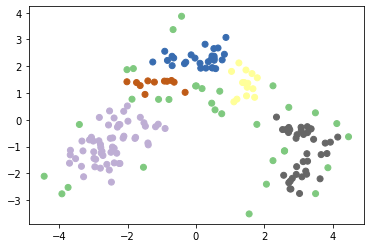

In [30]:
plt.scatter('PC1', 'PC2',c=labels, cmap= plt.cm.Accent, data=Pc)

In [31]:
dbscan2 = DBSCAN(eps=0.60, min_samples=5)
dbscan2.fit(Pc)  

DBSCAN(eps=0.6)

In [32]:
labels2 = dbscan2.labels_
labels2

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

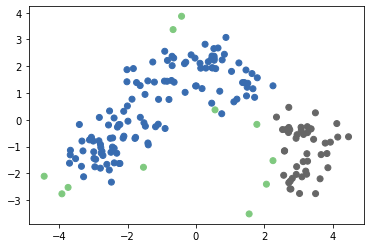

In [33]:
plt.scatter('PC1', 'PC2',c=labels2, cmap= plt.cm.Accent, data=Pc)

## DBSCAN gives better cluster sets 3 clusters it seperates the outliers and the dense shape of the feature